In [759]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu

from functions import * 


In [760]:
variation_test_csv = pd.read_csv('csv_files/df_final_experiment_clients.txt')
footprint1_csv = pd.read_csv('csv_files/df_final_web_data_pt_1.txt')
footprint2_csv = pd.read_csv('csv_files/df_final_web_data_pt_2.txt')
customer_csv = pd.read_csv('csv_files/df_final_demo.txt')

In [761]:

customer_csv.sort_values(by=['calls_6_mnth', 'logons_6_mnth'], ascending=True).head(90)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
10,8368822,8.0,100.0,34.5,U,2.0,75578.54,0.0,3.0
17,3788589,10.0,122.0,32.5,M,2.0,30750.76,0.0,3.0
20,1502049,8.0,100.0,31.0,U,2.0,28952.15,0.0,3.0
...,...,...,...,...,...,...,...,...,...
622,9224876,23.0,278.0,37.0,M,2.0,53436.64,0.0,3.0
624,7176632,18.0,226.0,59.5,F,2.0,29811.11,0.0,3.0
628,4508825,5.0,71.0,26.5,U,2.0,42367.95,0.0,3.0
647,3010146,16.0,202.0,56.0,F,2.0,61579.65,0.0,3.0


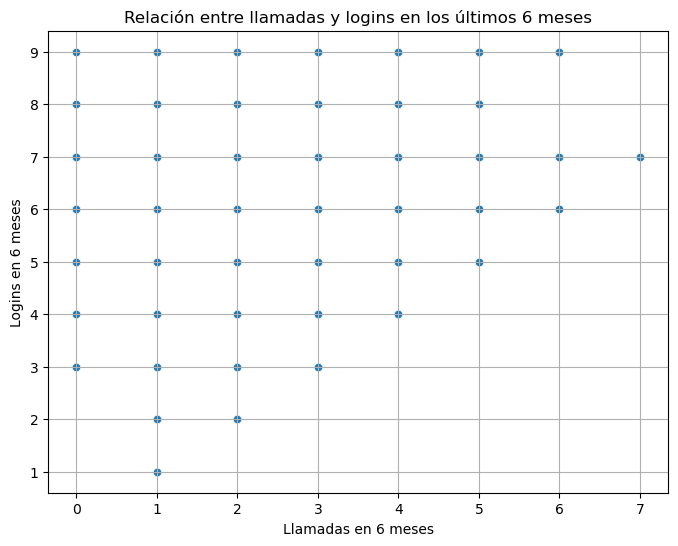

(       calls_6_mnth  logons_6_mnth
 count  70595.000000   70595.000000
 mean       3.382478       5.566740
 std        2.236580       2.353286
 min        0.000000       1.000000
 25%        1.000000       4.000000
 50%        3.000000       5.000000
 75%        6.000000       7.000000
 max        7.000000       9.000000,
                calls_6_mnth  logons_6_mnth
 calls_6_mnth       1.000000       0.822217
 logons_6_mnth      0.822217       1.000000)

In [762]:

# Descripción estadística
desc_stats = customer_csv[['calls_6_mnth', 'logons_6_mnth']].describe()

# Correlación entre llamadas y logins
correlation = customer_csv[['calls_6_mnth', 'logons_6_mnth']].corr()

# Visualización: Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='calls_6_mnth', y='logons_6_mnth', data=customer_csv)
plt.title('Relación entre llamadas y logins en los últimos 6 meses')
plt.xlabel('Llamadas en 6 meses')
plt.ylabel('Logins en 6 meses')
plt.grid(True)
plt.show()

# Mostrar estadísticas y correlación
desc_stats, correlation

# Limpieza pre-unión de DataFrames

- **Renombramos la columna 'Variation' pasándola a 'variation'**: 

In [763]:
variation_test_csv.rename(columns={'Variation': 'variation'}, inplace=True)

- **Eliminamos las filas con valores nulos en la columna 'variation'**
- **Eliminamos clientes con valores nulos en la columna 'clnt_tenure_yr'**

In [764]:
drop_info_null(variation_test_csv,'variation')
drop_info_null(customer_csv,'clnt_tenure_yr')

Había 20109 filas con valores nulos que se han eliminado de variation
Había 14 filas con valores nulos que se han eliminado de clnt_tenure_yr


- **Renombramos los valores que aparecen dentro de 'variation'**: Los convertimos en valores booleanos 

In [765]:
variation_replace = {"Test": 1, "Control": 0}
replace_values(variation_test_csv, 'variation', variation_replace)

Se han reemplazado los valores de la columna 'variation' según el diccionario proporcionado.


/Users/gabrielacaseromonge/Documents/GitHub/A-B_Testing/functions_copy.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replace_dict)


# Unión de DataFrames

- **Concatenamos footprints**: 

In [766]:
footprint_csv = pd.concat([footprint1_csv, footprint2_csv], ignore_index=True)

In [767]:
footprint_csv

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


- **Corregimos los nombres de los pasos en process_step**: Ahora que tenemos juntos los dos data sets de footprints

In [768]:
process_replace = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}
replace_values(footprint_csv, 'process_step', process_replace)

Se han reemplazado los valores de la columna 'process_step' según el diccionario proporcionado.


/Users/gabrielacaseromonge/Documents/GitHub/A-B_Testing/functions_copy.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replace_dict)


- **Hacemos merge del DataFrame de variations con el de footprint**: Usando el valor común del client_id

In [769]:
df=pd.merge(footprint_csv, variation_test_csv, on='client_id', how='left')    

In [770]:
# este es el df de aquellos clientes que no tienen asignado un valor en la columna variation
# con lo cual no aportan información en cuanto al AB testing
missing_variation = footprint_csv[~footprint_csv['client_id'].isin(variation_test_csv['client_id'])]

- **Hacemos el merge que queda**: Volvemos a usar client_id como punto de unión.

In [771]:
df = pd.merge(df, customer_csv, on='client_id', how='left').reset_index(drop=True)

# Limpieza y control de los datos post merge

- **Limpieza de valores nulos en variation**: Al ser un dato crucial no nos aporta información valiosa una fila de cliente sin este dato.
Eliminamos las filas con valores nulos en variation con la seguridad de que están guardados en missing_variation
- **Limpieza de valores nulos en clnt_tenure_yr**

In [772]:
drop_info_null(df,'variation')
drop_info_null(df,'clnt_tenure_yr')

Había 434096 filas con valores nulos que se han eliminado de variation
Había 102 filas con valores nulos que se han eliminado de clnt_tenure_yr


In [773]:
df.isnull().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
variation            0
clnt_tenure_yr       0
clnt_tenure_mnth     0
clnt_age            12
gendr                0
num_accts            0
bal                  0
calls_6_mnth         0
logons_6_mnth        0
dtype: int64

In [774]:
cols_to_convert = [
    "clnt_tenure_yr",
    "clnt_tenure_mnth",
    "num_accts",
    "variation",
    "calls_6_mnth",
    "logons_6_mnth"
]
print(df[cols_to_convert].dtypes)

clnt_tenure_yr      float64
clnt_tenure_mnth    float64
num_accts           float64
variation           float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object


- **Conversión a int de floats**

In [775]:
cols_to_convert = [
    "clnt_tenure_yr",
    "clnt_tenure_mnth",
    "num_accts",
    "variation",
    "calls_6_mnth",
    "logons_6_mnth"
]

for col in cols_to_convert:
    # Si hay algún valor que no se puede convertir, usar `pd.to_numeric` con `errors='coerce'`
    df[col] = df[col].astype(int)

- **Examinamos los valores nulos** y los eliminamos ya que son muy pocos

In [776]:
df.dropna(inplace=True)

# Creación de rangos de edades

In [777]:
df = categorize_age_groups(df, 'clnt_age', 'age_group', 17, 97, 5)

# Análisis de los clientes



- **Examinamos la edades**: Se comprueba que no existan edades que no tengan sentido y se crea un grupo con los outliers que nos interesen para poder analizarlo.

In [778]:
outliers_age = df[(df['clnt_age'] < 18) | (df['clnt_age'] > 95)]
outliers_grouped = outliers_age[['client_id', 'clnt_age']].drop_duplicates()
outliers_grouped

#podemos ver que hay clientes menores de 18, qué hacer con eso? 

,client_id,clnt_age
14509,7953598,17.5
24437,5114008,17.5
33734,4996294,17.5
37287,7128753,17.5
38951,1273146,17.5
...,...,...
226347,8927242,17.5
236209,2064675,17.5
415436,9206649,96.0
492703,2364116,17.0


**Creación de un df en el que analizar únicamente el tipo de cliente que nos interesa**

In [779]:
client_analysis_df = df.copy()

- **Creamos un group by client_id.** Ya que no interesa para el analisis del tipo de cliente que haya más de una fila por cada cliente, datos del tipo edad, genero, etc, no van a verse afectados por la columna date_time.

In [780]:
# Lista de columnas que usarán 'first'
first_cols = [
    'clnt_age',
    'logons_6_mnth',
    'clnt_tenure_yr',
    'clnt_tenure_mnth',
    'num_accts',
    'bal',
    'calls_6_mnth'
]

# Llamar a la función
unique_client_analysis_df = unique_client_analysis(client_analysis_df, first_cols, 'gendr','client_id' )

- **Hacemos un describe para entender los datos.** A grandes rasgos, y sin haber entrado todavía a limpiar en profundidad.

In [781]:
unique_client_analysis_df.describe()

,client_id,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000
mean,5.006180e+06,47.319795,6.131856,12.031810,150.416365,2.254580,1.495168e+05,3.093272
std,2.877445e+06,15.518616,2.175441,6.860326,81.945403,0.533675,3.020390e+05,2.188009
min,5.550000e+02,17.000000,3.000000,2.000000,33.000000,1.000000,2.378944e+04,0.000000
25%,2.515688e+06,33.500000,4.000000,6.000000,82.000000,2.000000,3.987718e+04,1.000000
50%,5.025043e+06,48.000000,6.000000,11.000000,136.000000,2.000000,6.573433e+04,3.000000
75%,7.477922e+06,59.500000,8.000000,16.000000,192.000000,2.000000,1.399583e+05,5.000000
max,9.999832e+06,96.000000,9.000000,55.000000,669.000000,7.000000,1.632004e+07,6.000000


- **Creamos unas gráficas que nos ayuden a entender los datos.**

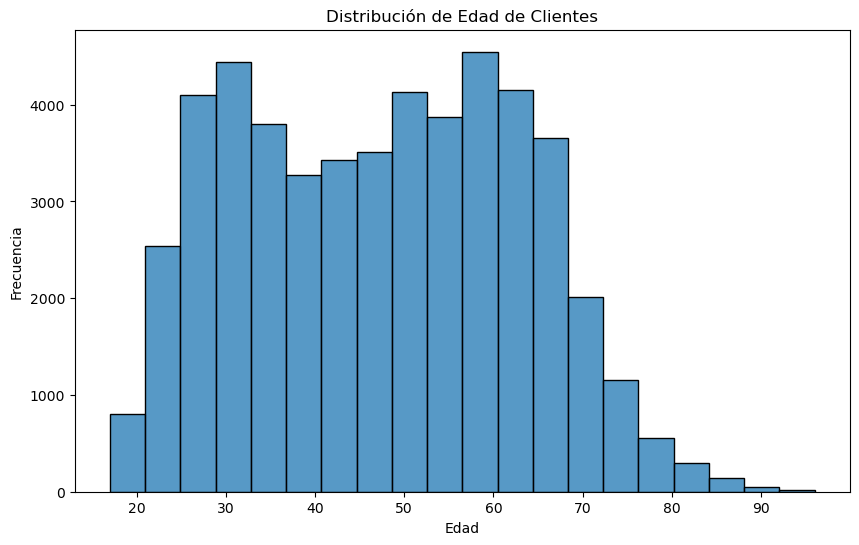

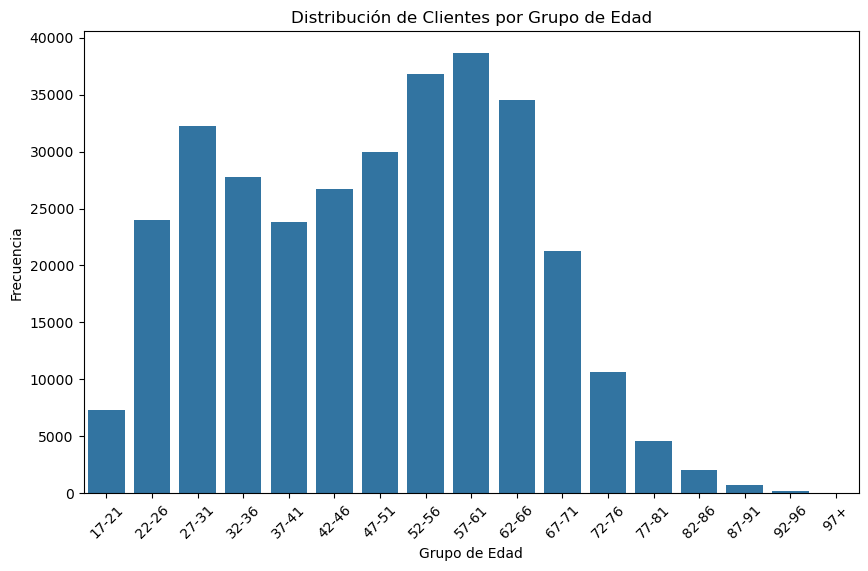

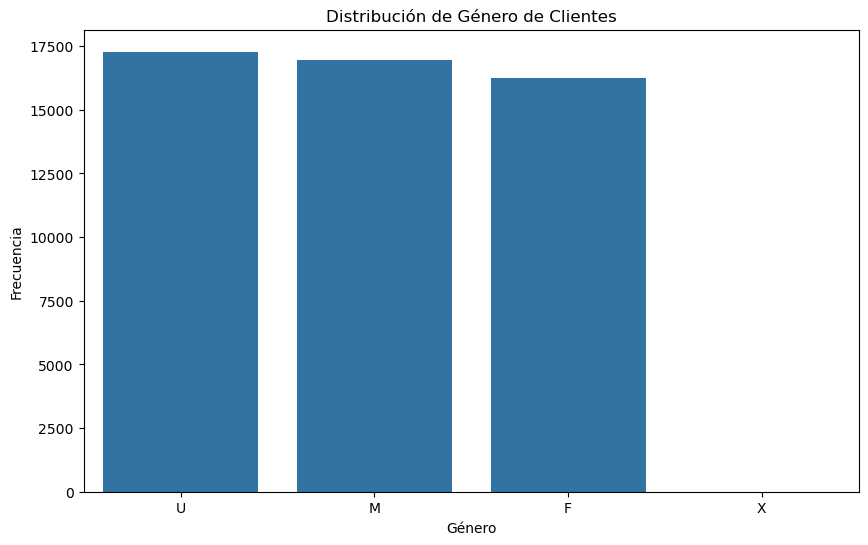

In [782]:
# g´rafico de edad de clientes
plot_distribution(unique_client_analysis_df, 'histplot', 'clnt_age', 
                  'Distribución de Edad de Clientes', 'Edad', 'Frecuencia', bins=20)

# Gráfico de distribución de clientes por grupo de edad
plot_distribution(df, 'countplot', 'age_group', 
                  'Distribución de Clientes por Grupo de Edad', 'Grupo de Edad', 'Frecuencia', 
                  rotation=45)  # Rota las etiquetas si son largas

# Gráfico de distribución de género de clientes
plot_distribution(unique_client_analysis_df, 'countplot', 'gendr', 
                  'Distribución de Género de Clientes', 'Género', 'Frecuencia')


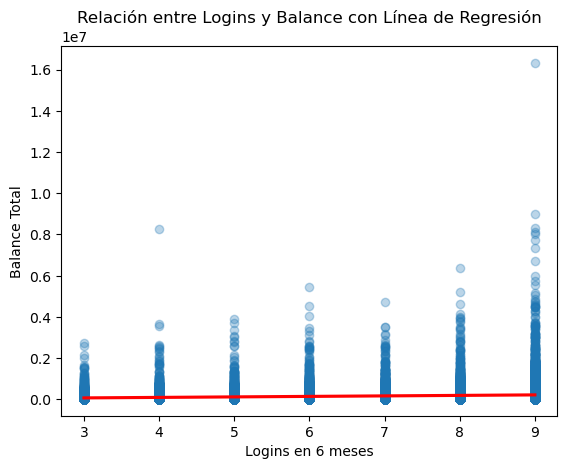

In [783]:
sns.regplot(data=unique_client_analysis_df, x='logons_6_mnth', y='bal', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Logins y Balance con Línea de Regresión')
plt.xlabel('Logins en 6 meses')
plt.ylabel('Balance Total')
plt.show()

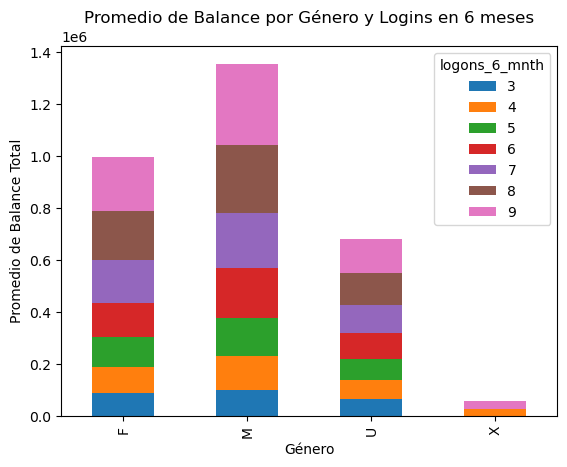

In [784]:
balance_gender_logons = unique_client_analysis_df.groupby(['gendr', 'logons_6_mnth'])['bal'].mean().unstack()

# Gráfico de barras apiladas
balance_gender_logons.plot(kind='bar', stacked=True)
plt.title('Promedio de Balance por Género y Logins en 6 meses')
plt.xlabel('Género')
plt.ylabel('Promedio de Balance Total')
plt.show()

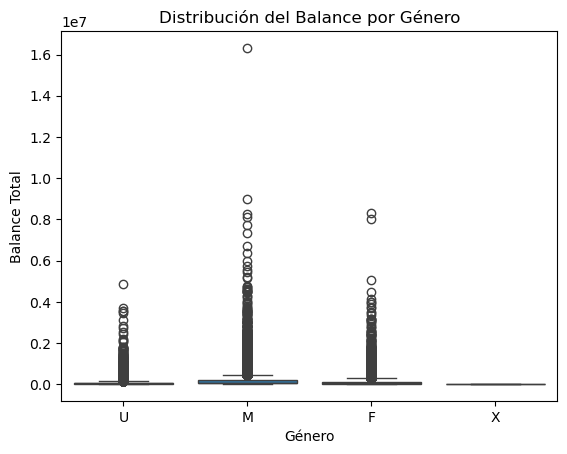

In [785]:
sns.boxplot(data=unique_client_analysis_df, x='gendr', y='bal')
plt.title('Distribución del Balance por Género')
plt.xlabel('Género')
plt.ylabel('Balance Total')
plt.show()

- **Analizamos Skewness y Kurtosis de algunos datos**

In [786]:
skewness_bal = unique_client_analysis_df['bal'].skew()
kurtosis_bal = unique_client_analysis_df['bal'].kurtosis()

print(f'skewness del balance: {skewness_bal}, hay un número significativo de clientes con balances muy altos')
print(f'Kurtosis del balance: {kurtosis_bal}, la distribución tiene una cantidad inusualmente alta de outliers.')

skewness_years = unique_client_analysis_df['clnt_tenure_yr'].skew()
kurtosis_years = unique_client_analysis_df['clnt_tenure_yr'].kurtosis()

print(f'skewness del clnt_tenure_yr: {skewness_years} hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes')
print(f'Kurtosis del clnt_tenure_yr: {kurtosis_years}, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media')

skewness del balance: 11.47407650252342, hay un número significativo de clientes con balances muy altos
Kurtosis del balance: 294.1124758573803, la distribución tiene una cantidad inusualmente alta de outliers.
skewness del clnt_tenure_yr: 1.0317878940266119 hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes
Kurtosis del clnt_tenure_yr: 1.0179025974588907, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media


- **Investigamos quiénes serían nuestros clientes VIP, estándar y otros:**
Según el balance en las cuentas y número de cuentas

In [787]:
unique_client_analysis_df.sort_values('bal', ascending=False).head(10)

,client_id,gendr,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
46967,9286288,M,62.5,9,21,254,3,16320040.15,6
35733,7070097,M,53.0,9,11,133,2,8986419.77,6
47748,9440656,F,63.0,9,7,94,2,8292996.21,6
11501,2291985,M,41.0,4,7,85,2,8247729.97,1
8399,1678193,M,65.5,9,24,299,3,8137343.24,6
34140,6762377,F,41.5,9,16,193,3,8045102.60,6
17642,3519657,M,66.5,9,18,218,6,7741994.01,6
4950,987970,M,74.5,9,14,179,3,7339443.17,4
4313,857273,M,56.5,9,31,376,5,6716305.28,6
46993,9290030,M,67.5,8,28,341,4,6353000.43,5


In [788]:
df['client_type'] = classify_clients(df, 'bal', 'num_accts')

- **A pesar de que los clientes VIP tienen de media un balance mucho mayor, los clientes estándar acumulan más balance como grupo, y lo mismo con el número de cuentas**


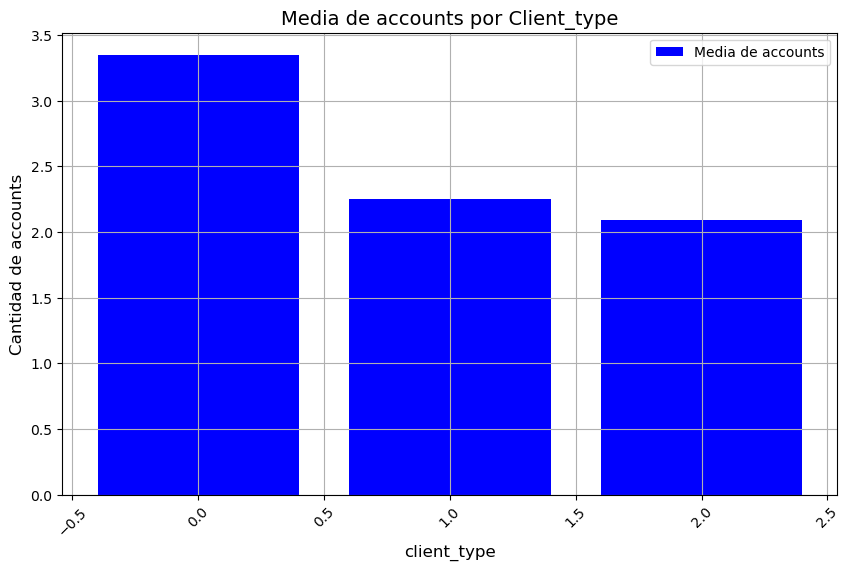

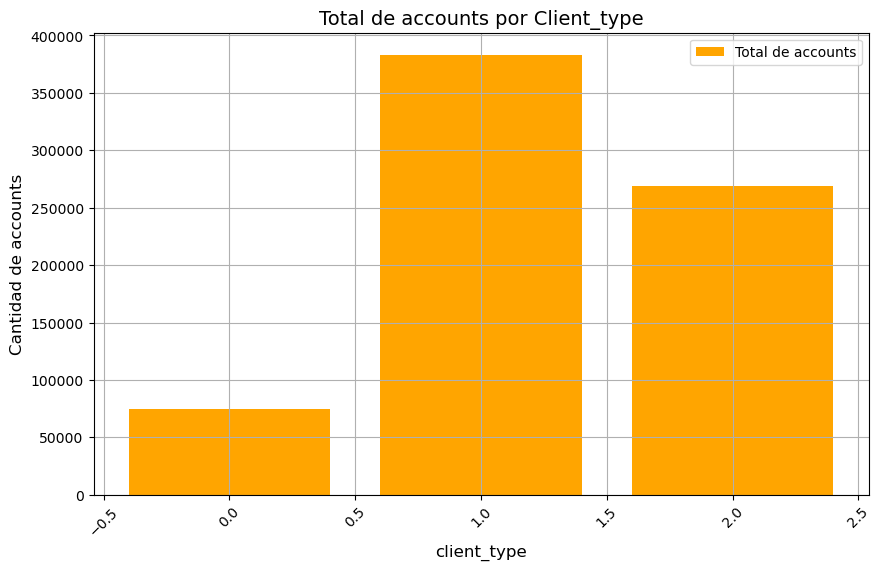

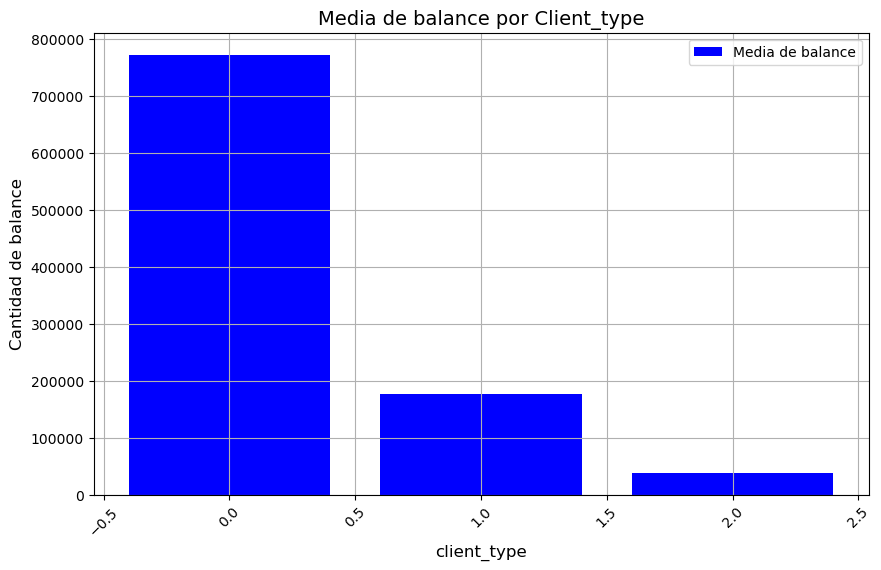

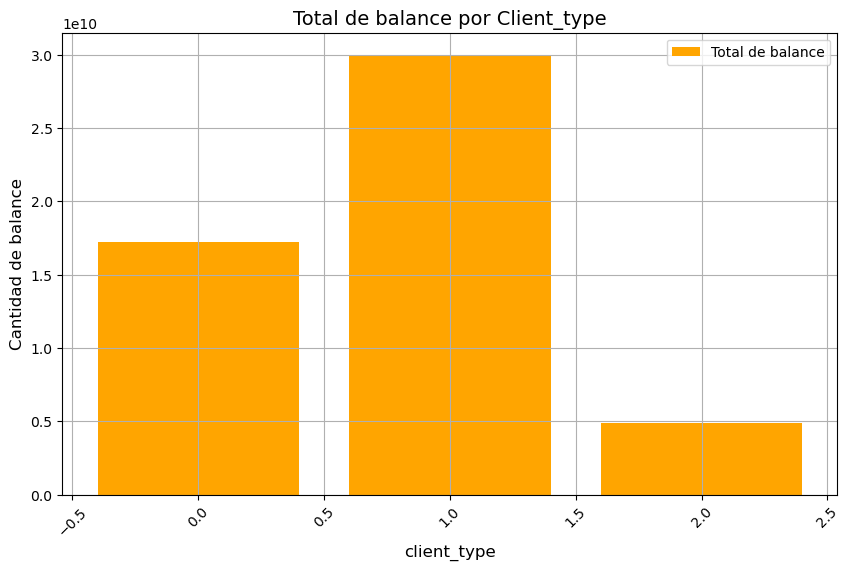

In [789]:
plot_separate_metrics_by_group(df, 'client_type', 'num_accts', 'accounts')  # Gráficos separados para cuentas
plot_separate_metrics_by_group(df, 'client_type', 'bal', 'balance')  # Gráficos separados para balances


- **Limpieza de gender**: Se examinan los distintos valores de gender que hay en el data set.

In [790]:
unique_client_analysis_df['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

# Comprobaciones del Funcionamiento

- **Confirmamos que es un test ciego**: Se comprueba que no exista relación entre el género y la variation

In [791]:
# analizar la variación de género
chi2_gender, p_gender, contingency_table_gender = analyze_contingency_table(client_analysis_df, 'gendr', 'variation')

Chi2: 0.00034921226276692855, P-value: 0.9999982645682544
Tabla de Contingencia Normalizada:
variation         0         1
gendr                        
F          0.318846  0.329411
M          0.336962  0.335739
U          0.344193  0.334805
X          0.000000  0.000045


In [792]:
# Calcular los grados de libertad gender_variation
n_rows_gender_var = contingency_table_gender.shape[0]  # Número de filas
n_col_gender_var = contingency_table_gender.shape[1]  # Número de columnas

df_gender_var = (n_rows_gender_var - 1) * (n_col_gender_var - 1)

# Definir nivel de significancia 
alpha = 0.05

# Calcular el valor crítico 
valor_critico_gender_var = stats.chi2.ppf(1 - alpha, df_gender_var)
valor_critico_gender_var

7.814727903251179

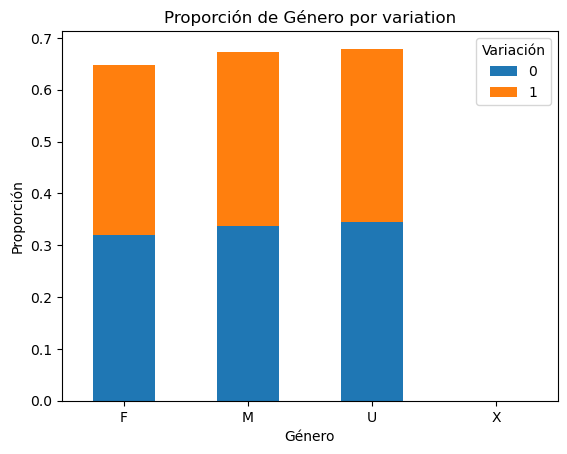

In [793]:
contingency_table_gender.plot(kind='bar', stacked=True)
plt.title('Proporción de Género por variation')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Variación')
plt.show()

- **Confirmamos que es un test ciego**: Se comprueba que no exista relación entre la edad y la variation

In [794]:
# analizar la variación de edad
chi2_age, p_age, contingency_table_age = analyze_contingency_table(client_analysis_df, 'clnt_age', 'variation')

Chi2: 0.016614219813777472, P-value: 1.0
Tabla de Contingencia Normalizada:
variation         0         1
clnt_age                     
17.0       0.000077  0.000045
17.5       0.001255  0.001305
18.0       0.001234  0.000787
18.5       0.001764  0.002565
19.0       0.001395  0.001451
...             ...       ...
93.5       0.000223  0.000000
94.0       0.000084  0.000073
94.5       0.000000  0.000028
95.5       0.000000  0.000034
96.0       0.000028  0.000034

[158 rows x 2 columns]


In [795]:
# Calcular los grados de libertad
n_rows_age_variation = contingency_table_age.shape[0]  # Número de filas
n_col_age_variation = contingency_table_age.shape[1]  # Número de columnas

df_age_variation = (n_rows_age_variation - 1) * (n_col_age_variation - 1)

In [796]:
# Definir nivel de significancia
alpha = 0.05

# Calcular el valor crítico
valor_critico_age_variation = stats.chi2.ppf(1 - alpha, df_age_variation)
valor_critico_age_variation

187.23886994495388

- **Tiempo transcurrido en cada paso**: Se registra cuánto tiempo se ha pasado en cada paso según la variation y el cliente.

Empezamos por step y variation y más adelante lo relacionamos con el cliente

In [797]:
# Ordenar el DataFrame
df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Convertir la columna de fecha y hora a tipo datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Calcular la diferencia de tiempo entre pasos
df['time_diff'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff(-1).abs()

# Para evitar eliminar filas con dropna, podemos establecer un valor por defecto (por ejemplo, 0) o manejar NaN más adelante
df['time_diff'].fillna(pd.Timedelta(seconds=0), inplace=True)

# Calcular el tiempo en el paso anterior
df['time_in_step'] = df['time_diff'].shift(1)

# También puedes llenar los NaN en 'time_in_step' con un valor por defecto (0, por ejemplo) si no es crítico para tu análisis
df['time_in_step'].fillna(pd.Timedelta(seconds=0), inplace=True)

# Ahora, verifica que tienes todas las filas que necesitas
print(f"Tamaño final de df: {df.shape}")

Tamaño final de df: (321195, 18)


/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/3883555272.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_diff'].fillna(pd.Timedelta(seconds=0), inplace=True)
/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/3883555272.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

- **En este gráfico con 100 medidas al azar por paso podemos ver que hay algunos outliers pero se observan diferencias entre las variaciones A y B y el tiempo pasado en los pasos**

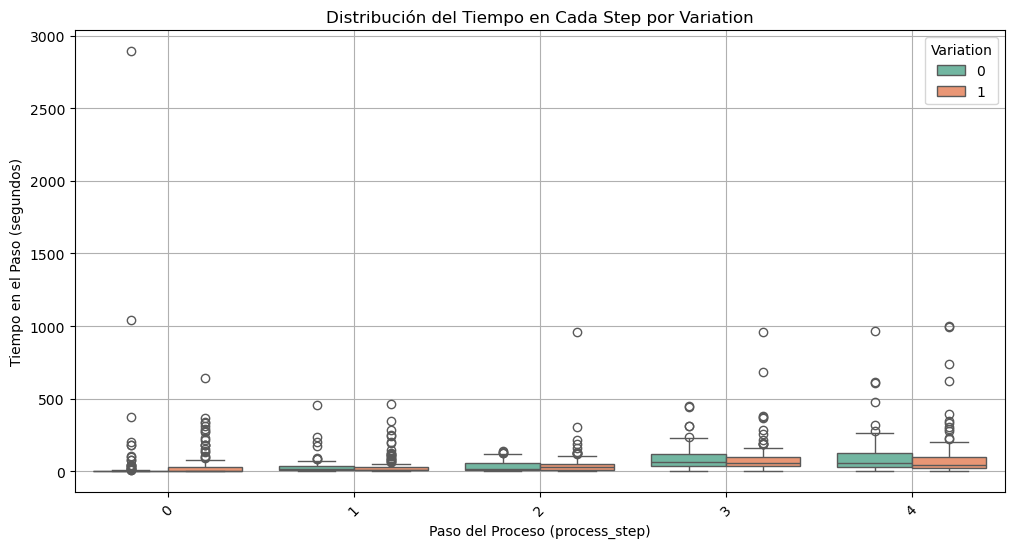

In [798]:

# 'time_in_step' en segundos
df['time_in_step'] = df['time_in_step'].dt.total_seconds()


# Seleccionamos 100 valores aleatorios del tiempo en cada step y cada variation
sampled_data = df.groupby(['process_step', 'variation'])['time_in_step'].apply(
    lambda x: x.sample(min(100, len(x)), random_state=1)
).reset_index()

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='time_in_step', hue='variation', data=sampled_data, palette='Set2')
plt.title('Distribución del Tiempo en Cada Step por Variation')
plt.xlabel('Paso del Proceso (process_step)')
plt.ylabel('Tiempo en el Paso (segundos)')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.grid(True)
plt.show()


- **Examinamos el tiempo medio pasado en cada step, antes y después de outliers**

In [799]:
avg_time_step_var = df.groupby(['process_step', 'variation'])['time_in_step'].mean().reset_index()
avg_time_step_var = avg_time_step_var.rename(columns={'time_in_step': 'avg_time_in_step'})
avg_time_step_var

,process_step,variation,avg_time_in_step
0,0,0,53.099372
1,0,1,61.024074
2,1,0,42.590619
3,1,1,37.406627
4,2,0,38.503420
5,2,1,47.869779
6,3,0,92.248387
7,3,1,95.848849
8,4,0,123.037033
9,4,1,111.811790


In [800]:
# detectar outliers y definirlos, para repetir el proceso
Q1 = df['time_in_step'].quantile(0.25)
Q3 = df['time_in_step'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# eliminar outliers
df_filtered = df[(df['time_in_step'] >= lower_bound) & (df['time_in_step'] <= upper_bound)]

clean_avg_time_var_result = df_filtered.groupby(['process_step', 'variation'])['time_in_step'].mean().reset_index()
clean_avg_time_var_result = clean_avg_time_var_result.rename(columns={'time_in_step': 'avg_time_in_step'})
clean_avg_time_var_result

,process_step,variation,avg_time_in_step
0,0,0,10.311868
1,0,1,16.818701
2,1,0,26.767953
3,1,1,20.699051
4,2,0,29.982799
5,2,1,32.122421
6,3,0,60.228593
7,3,1,62.257773
8,4,0,59.255931
9,4,1,45.651704


In [801]:
# Renombrar la columna 'avg_time_in_step' en el segundo DataFrame
clean_avg_time_var_result.rename(columns={'avg_time_in_step': 'avg_clean_time'}, inplace=True)

# Renombrar la columna 'avg_time_in_step' en el primer DataFrame
avg_time_step_var.rename(columns={'avg_time_in_step': 'avg_raw_time'}, inplace=True)

time_step_df = pd.merge(clean_avg_time_var_result, avg_time_step_var, on=['process_step', 'variation'], how='outer')


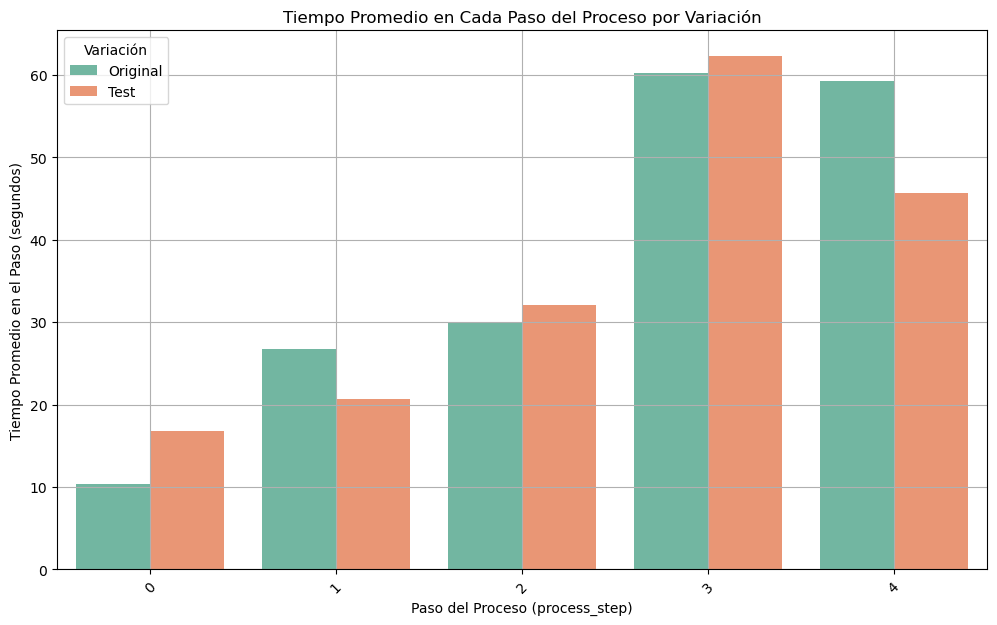

In [804]:

# Creamos el gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='process_step', y='avg_clean_time', hue='variation', data=clean_avg_time_var_result, palette='Set2')

# Configuración del gráfico
plt.title('Tiempo Promedio en Cada Paso del Proceso por Variación')
plt.xlabel('Paso del Proceso (process_step)')
plt.ylabel('Tiempo Promedio en el Paso (segundos)')
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Original', 'Test'], title='Variación')
plt.grid(True)


# Mostramos el gráfico
plt.show()

- **Creamos una columna con el tiempo total que un mismo visit_id ha tardado en completar todos los pasos**

In [805]:
# Asegurarse de que cada visit_id tenga los pasos en el orden 0, 1, 2, 3, 4
success_visits = df.groupby('visit_id').filter(
    lambda x: (x['process_step'].tolist() == [0, 1, 2, 3, 4]) and (len(x) == 5)
)

# Calcular el tiempo total solo para los visit_id válidos
total_time = success_visits.groupby('visit_id').apply(
    lambda x: x['date_time'].max() - x['date_time'].min()
).reset_index()

# Renombramos las columnas para que coincidan con el nombre del df original
total_time.columns = ['visit_id', 'completion_time_s']

# Convertimos completion_time a segundos directamente
total_time['completion_time_s'] = pd.to_timedelta(total_time['completion_time_s']).dt.total_seconds()

# Unimos la información de tiempo total al df original
df = df.merge(total_time, on='visit_id', how='left')


/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/1594267618.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_time = success_visits.groupby('visit_id').apply(


In [806]:
total_time.to_csv('csv_files/completion_time_df.csv', index=False)

In [807]:
success_visits['client_id'].value_counts()

client_id
9288992    10
4494718    10
7002612    10
7619785    10
250165     10
           ..
3364495     5
3364339     5
3362885     5
3362285     5
9999729     5
Name: count, Length: 19358, dtype: int64

In [808]:
# Contar cuántas filas tienen process_step = 4
count_process_step_4 = df[df['process_step'] == 4].shape[0]

# Contar cuántas filas tienen completion_time no NaT
count_completion_time_not_nan = df[pd.notna(df['completion_time_s'])].shape[0]

# Mostrar resultados
print(f"Número de filas con process_step = 4: {count_process_step_4}")
print(f"Número de filas con completion_time no NaT: {count_completion_time_not_nan}")



Número de filas con process_step = 4: 43214
Número de filas con completion_time no NaT: 96905


- **Veces que se ha completado el proceso**: Se registra cuántas veces por variation se ha llegado al último paso del proceso. 

In [809]:
# 1. Filtrar los visit_id que alcanzaron el process_step 4
visit_step4 = df[df['process_step'] == 4]

# 2. Agrupar por variation y contar los visit_id únicos que alcanzaron el paso 4
visit_step4_counts = visit_step4.groupby('variation')['visit_id'].nunique()

# 3. Calcular el total de visit_id únicos por variation (sin filtrar por el step)
total_visits_by_variation = df.groupby('variation')['visit_id'].nunique()

# 4. Calcular el porcentaje de éxito para cada variación
percentage_success = (visit_step4_counts / total_visits_by_variation) * 100

# Mostrar el resultado
result = pd.DataFrame({
    'visit_ids_step_4': visit_step4_counts,
    'total_visit_ids': total_visits_by_variation,
    'success_percentage': percentage_success
})

result

,visit_ids_step_4,total_visit_ids,success_percentage
variation,,,
0,16039,32181,49.839968
1,21725,37122,58.523248


- **Veces en que se ha realizado un salto en steps que no es posible**: Se registra cuántas veces y en qué steps se ha pasado de un step a otro que no fuera el siguiente ni el anterior y en qué steps y variation ha ocurrido.

In [810]:
df = df[df['process_step'].isin([0, 1, 2, 3, 4])]
df['process_step'] = df['process_step'].astype(int)

resultado=salto_mayor_a_1(df)

#clientes_con_salto = df.groupby(['client_id', 'visitor_id', 'visit_id']).apply(salto_mayor_a_1)


In [811]:
df.groupby(['client_id', 'visitor_id', 'visit_id','process_step']).apply(salto_mayor_a_1)

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/3047390539.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['client_id', 'visitor_id', 'visit_id','process_step']).apply(salto_mayor_a_1)


client_id  visitor_id             visit_id                      process_step
555        402506806_56087378777  637149525_38041617439_716659  0               False
                                                                1               False
                                                                2               False
                                                                3               False
                                                                4               False
                                                                                ...  
9999729    843385170_36953471821  493310979_9209676464_421146   0               False
                                                                1               False
                                                                2               False
9999832    145538019_54444341400  472154369_16714624241_585315  0               False
                                                               

In [812]:
jumps = resultado.groupby(['first_step', 'sec_step'], as_index=False).agg(count=('first_step', 'count'))
jumps

,first_step,sec_step,count
0,0,2,4901
1,0,3,7071
2,0,4,34139
3,1,3,1075
4,1,4,365
5,2,0,529
6,2,4,85
7,3,0,612
8,3,1,106
9,4,0,635


- **Veces en las que se ha pasado tiempo insuficiente en un step**: Se registra cuántas veces se ha pasado al siguiente step demasiado rápido y se relaciona con la variation.

In [813]:
#code aquí

- **Tasa de error**: Se registra la cantidad de veces que en lugar de avanzar en el proceso se ha retrocedido o saltado a otro paso que no correspondía. Porcentaje de errores de regresión en relación con el total de registros

In [814]:

df.sort_values(['visit_id', 'date_time'], ascending=False)

df['regr_error']=False 

df = df.reset_index(drop=True)

df['next_process_step']=df['process_step'].shift(-1)
df['next_visit_id']=df['visit_id'].shift(-1)

for i in range(0,len(df)-1):
    if (df.loc[i,'next_process_step'] < df.loc[i,'process_step'])and(df.loc[i,'next_visit_id']== df.loc[i,'visit_id']):
        df.loc[i,'regr_error'] = True 

error_rate=df['regr_error'].sum()/len(df)*100
error_rate

# Ahora, calcular la tasa de error por variación
error_rate_by_variation = df.groupby('variation').apply(
    lambda x: x['regr_error'].sum() / len(x) * 100
).reset_index(name='error_rate')

# Renombrar las columnas para mayor claridad
error_rate_by_variation.columns = ['variation', 'error_rate']

# Mostrar los resultados
error_rate_by_variation



/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/1033360614.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_rate_by_variation = df.groupby('variation').apply(


,variation,error_rate
0,0,6.701160
1,1,9.136776


In [815]:
error_rate, df_with_errors = detect_regression_errors(df)
error_rate_by_variation = calculate_error_rate_by_variation(df_with_errors)

print("Tasa de error general:", error_rate)
print("Tasa de error por variación:")
print(error_rate_by_variation)

Tasa de error general: 8.049315836174287
Tasa de error por variación:
   variation  error_rate
0          0    6.701160
1          1    9.136776


In [816]:
df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group,client_type,time_diff,time_in_step,completion_time_s,regr_error,next_process_step,next_visit_id
0,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,1,3,46,29.5,U,2,25454.66,2,6,27-31,2,0 days 00:00:07,0.0,158.0,False,1.0,637149525_38041617439_716659
1,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,1,3,46,29.5,U,2,25454.66,2,6,27-31,2,0 days 00:00:32,7.0,158.0,False,2.0,637149525_38041617439_716659
2,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,1,3,46,29.5,U,2,25454.66,2,6,27-31,2,0 days 00:01:39,32.0,158.0,False,3.0,637149525_38041617439_716659
3,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,1,3,46,29.5,U,2,25454.66,2,6,27-31,2,0 days 00:00:20,99.0,158.0,False,4.0,637149525_38041617439_716659
4,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:34,1,3,46,29.5,U,2,25454.66,2,6,27-31,2,0 days 00:00:00,20.0,158.0,False,0.0,40369564_40101682850_311847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,9999729,843385170_36953471821,493310979_9209676464_421146,1,2017-04-20 14:22:49,1,10,124,31.0,F,3,107059.74,6,9,27-31,1,0 days 00:04:47,82.0,NaN,False,2.0,493310979_9209676464_421146
321191,9999729,843385170_36953471821,493310979_9209676464_421146,2,2017-04-20 14:27:36,1,10,124,31.0,F,3,107059.74,6,9,27-31,1,0 days 00:01:21,287.0,NaN,True,0.0,493310979_9209676464_421146
321192,9999729,843385170_36953471821,493310979_9209676464_421146,0,2017-04-20 14:28:57,1,10,124,31.0,F,3,107059.74,6,9,27-31,1,0 days 00:00:00,81.0,NaN,False,0.0,472154369_16714624241_585315
321193,9999832,145538019_54444341400,472154369_16714624241_585315,0,2017-05-16 16:46:03,1,23,281,49.0,F,2,431887.61,1,4,47-51,1,0 days 00:00:08,0.0,NaN,False,1.0,472154369_16714624241_585315


In [817]:
df_no_errors = filter_no_errors(df)  # Filtrar sin errores
time_data = calculate_average_time_per_variation(df_no_errors)  # Calcular el tiempo promedio
average_time_df_with_errors = create_average_time_dataframe(time_data)  # Crear DataFrame con los resultados

average_time_df_with_errors

,variation,average_time
0,0,49.938957
1,1,51.998624


In [818]:
df_filtered = filter_no_errors_and_outliers(df)  # Filtrar sin errores y outliers
time_data = calculate_average_time_per_variation(df_filtered)  # Calcular el tiempo promedio
average_time_df_clean = create_average_time_dataframe(time_data)  # Crear DataFrame con los resultados

average_time_df_clean


,variation,average_time
0,0,25.640537
1,1,26.728033


### Estadística ###

In [819]:
#H0: age control website == age test website

t_stat, p_value = stats.ttest_ind(
    client_analysis_df[client_analysis_df['variation'] == 0]['clnt_age'],
    client_analysis_df[client_analysis_df['variation'] == 1]['clnt_age']
)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -7.926400435419628, p-value: 2.263054043650746e-15


In [820]:
# Realizar el test de Mann-Whitney U
u_stat, p_value = mannwhitneyu(
    client_analysis_df[client_analysis_df['variation'] == 0]['clnt_age'],
    client_analysis_df[client_analysis_df['variation'] == 1]['clnt_age']
)

print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value}")

Mann-Whitney U Test: U-statistic = 12535539628.0, p-value = 4.1256681803564804e-16


In [821]:
# Calcular la media para cada grupo
mean_control = client_analysis_df[client_analysis_df['variation'] == 0]['clnt_age'].mean()
mean_test = client_analysis_df[client_analysis_df['variation'] == 1]['clnt_age'].mean()

# Calcular la diferencia de medias
diff_means = mean_test - mean_control

print(f"Mean age - Control group: {mean_control}")
print(f"Mean age - Test group: {mean_test}")
print(f"Difference in mean age (Test - Control): {diff_means}")

Mean age - Control group: 48.30989554278701
Mean age - Test group: 48.75001828030171
Difference in mean age (Test - Control): 0.44012273751469877


Aunque la diferencia en las edades es estadísticamente significativa (como ya viste por el bajo p-value), la magnitud de la diferencia en la media de edad es muy pequeña. Una diferencia de 0.44 años (menos de medio año) es probablemente insignificante desde un punto de vista práctico.

### Conclusión: Las edades del grupo de control (variante 0) y el grupo de prueba (variante 1) no son iguales, es decir, probablemente hay una diferencia real entre las dos versiones del sitio web en cuanto a las edades de los usuarios.

In [822]:
#H0: process_step 4 control website == process_step 4 test website

t_stat, p_value = stats.ttest_ind(
    client_analysis_df[client_analysis_df['variation'] == 0]['process_step'],
    client_analysis_df[client_analysis_df['variation'] == 1]['process_step']
)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -9.839124304028129, p-value: 7.694324640968301e-23


In [823]:
# Calcular la media para cada grupo
mean_control_process = client_analysis_df[client_analysis_df['variation'] == 0]['process_step'].mean()
mean_test_process = client_analysis_df[client_analysis_df['variation'] == 1]['process_step'].mean()

# Calcular la diferencia de medias
diff_means_process = mean_test_process - mean_control_process

print(f"Mean process step - Control group: {mean_control_process}")
print(f"Mean process step - Test group: {mean_test_process}")
print(f"Difference in mean process step (Test - Control): {diff_means_process}")

Mean process step - Control group: 1.5324389155416713
Mean process step - Test group: 1.5818760651791188
Difference in mean process step (Test - Control): 0.0494371496374475


Usamos ANOVA para hacer esta comparación porque estamos comparando varios grupos, más de 2, y es efectiva para evitar errores en esta situación. Analiza la variabilidad dentro de cada grupo (de las filas dentro de un grupo) y la variabilidad entre los grupos.

In [824]:
# Cargar datos (ejemplo)
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Asegúrate de que 'variation' esté en el DataFrame original
if 'variation' not in df.columns:
    print("La columna 'variation' no está en df. Asegúrate de que existe.")
else:
    # Calcular tiempo total por cliente dentro de cada visita hasta el paso 4
    total_time_per_client = (
        df[df['process_step'] <= 4]
        .groupby(['client_id', 'visit_id'])  # Agrupar por client_id y visit_id
        .agg(total_time=('time_in_step', 'sum'))
        .reset_index()
    )

    # Agrupar por edad y variación, considerando solo los IDs de cliente únicos
    age_grouped = df[['client_id', 'age_group', 'variation']].drop_duplicates()

    # Unir DataFrames
    result_df = total_time_per_client.merge(age_grouped, on='client_id')

    # Contar la cantidad de datos por grupo de edad y variación
    group_counts = result_df.groupby(['age_group', 'variation']).size()
    print("Conteo por grupo de edad y variación:")
    print(group_counts)

    # Filtrar grupos vacíos
    valid_groups = result_df.groupby(['age_group', 'variation']).filter(lambda x: len(x) > 0)

    # Verificar si hay grupos válidos
    if not valid_groups.empty:
        # Obtener los grupos para ANOVA, excluyendo aquellos que no tienen datos
        groups_for_anova = [group['total_time'].values for name, group in valid_groups.groupby(['age_group', 'variation'])]
        
        # Realizar ANOVA
        anova_result = stats.f_oneway(*groups_for_anova)
        print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")
    else:
        print("No hay grupos válidos para realizar ANOVA.")


Conteo por grupo de edad y variación:
age_group  variation
17-21      0             703
           1             836
22-26      0            2385
           1            2732
27-31      0            3203
           1            3735
32-36      0            2839
           1            3350
37-41      0            2428
           1            2782
42-46      0            2686
           1            3108
47-51      0            3013
           1            3418
52-56      0            3564
           1            4239
57-61      0            3814
           1            4297
62-66      0            3336
           1            3946
67-71      0            2241
           1            2495
72-76      0            1189
           1            1279
77-81      0             504
           1             581
82-86      0             219
           1             284
87-91      0              86
           1              97
92-96      0              25
           1              11
97+        0 

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/1832738281.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = result_df.groupby(['age_group', 'variation']).size()
/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/1832738281.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_groups = result_df.groupby(['age_group', 'variation']).filter(lambda x: len(x) > 0)
/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/1832738281.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass 

Estos resultados indican que hay diferencias significativas en los tiempos totales (total_time) entre al menos algunos de los grupos de edad (age_group). 

F-estadístico alto: Hay más variabilidad entre las medias de los grupos que dentro de los grupos.
p-valor bajo: Un p-valor tan pequeño indica que es muy poco probable que las diferencias observadas sean el resultado de la variabilidad aleatoria. Rechazamos la hipótesis nula de que no hay diferencias significativas entre los grupos de edad en cuanto al tiempo total de pasar por los steps.

In [825]:
pd.set_option('display.max_columns', None)


/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_861/743330773.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_total_time_variation = result_df.groupby(['age_group', 'variation'])['total_time'].mean().reset_index()


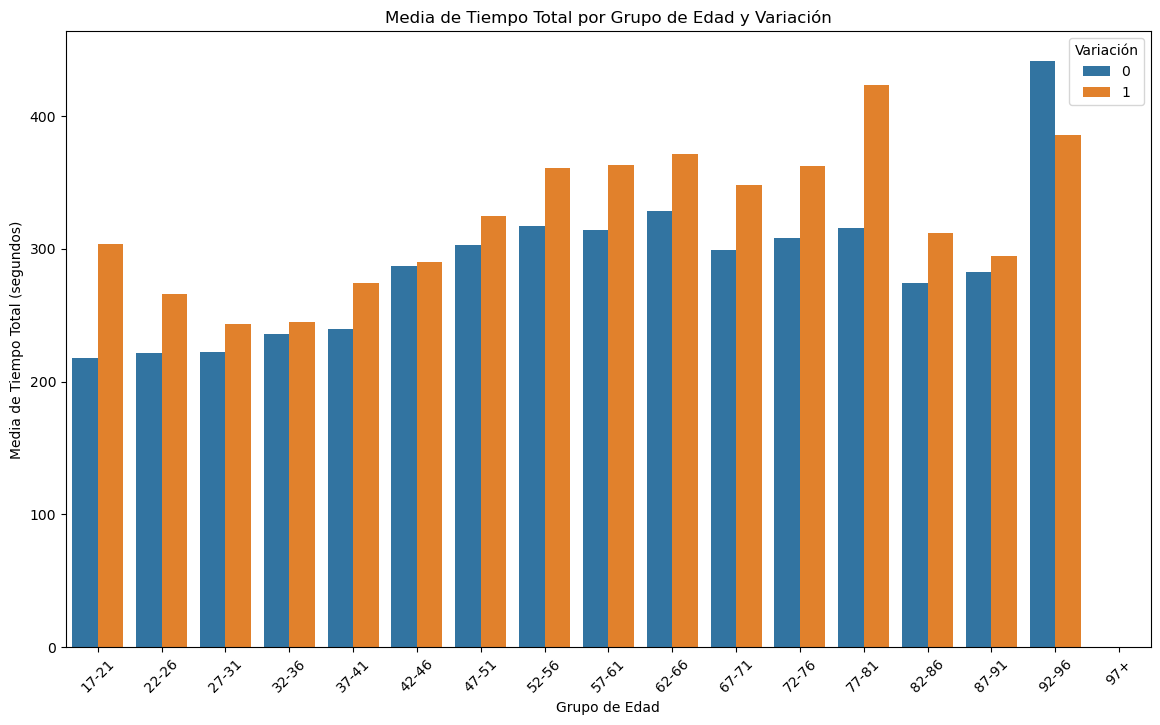

In [827]:
# Calcular la media de total_time por grupo de edad y variación
mean_total_time_variation = result_df.groupby(['age_group', 'variation'])['total_time'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='total_time', hue='variation', data=mean_total_time_variation)

# Añadir título y etiquetas
plt.title('Media de Tiempo Total por Grupo de Edad y Variación')
plt.xlabel('Grupo de Edad')
plt.ylabel('Media de Tiempo Total (segundos)')
plt.legend(title='Variación')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


In [828]:
# Correlación de Pearson
corr_coefficient, p_value_corr = stats.pearsonr(df['num_accts'], df['bal'])

print(f"Coeficiente de correlación: {corr_coefficient:.3f}, Valor p: {p_value_corr:.3f}")

# Interpretar el resultado
if p_value_corr < alpha:
    print("Se rechaza la hipótesis nula: hay una correlación significativa entre el número de cuentas y el saldo.")
else:
    print("No se rechaza la hipótesis nula: no hay correlación significativa entre el número de cuentas y el saldo.")

Coeficiente de correlación: 0.264, Valor p: 0.000
Se rechaza la hipótesis nula: hay una correlación significativa entre el número de cuentas y el saldo.


In [829]:
# Aplicando ANOVA
f_stat, p_value_anova = stats.f_oneway(
    df[df['age_group'] == '<30']['clnt_tenure_yr'].dropna(),
    df[df['age_group'] == '30-40']['clnt_tenure_yr'].dropna(),
    df[df['age_group'] == '40-50']['clnt_tenure_yr'].dropna(),
    df[df['age_group'] == '50-60']['clnt_tenure_yr'].dropna(),
    df[df['age_group'] == '60+']['clnt_tenure_yr'].dropna()
)

print(f"Estadístico F: {f_stat:.3f}, Valor p: {p_value_anova:.3f}")

# Interpretar el resultado
if p_value_anova < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en la duración de la relación del cliente entre grupos de edad.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa en la duración de la relación del cliente entre grupos de edad.")

Estadístico F: nan, Valor p: nan
No se rechaza la hipótesis nula: no hay diferencia significativa en la duración de la relación del cliente entre grupos de edad.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [830]:
df_male = df[df['gendr'] == 'M']['bal']
df_female = df[df['gendr'] == 'F']['bal']

# Realizando la prueba t de Student
t_stat, p_value = stats.ttest_ind(df_male, df_female, equal_var=False)  # Usamos equal_var=False para la prueba de Welch

print(f"Estadístico t: {t_stat:.3f}, Valor p: {p_value:.3f}")

alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en el saldo entre géneros.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa en el saldo entre géneros.")

Estadístico t: 50.406, Valor p: 0.000
Se rechaza la hipótesis nula: hay una diferencia significativa en el saldo entre géneros.
